### Score: `[51]`

Q1. `[14]` 1.1 pcolormesh() 查看全球分布情况，1.3 bug

Q2. `[22]` Good job

Q3. `[15]` MISSING 1 plot

In [1]:
q1_path = '..\\Assignment_rd_common_files\\200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc'
q2_path = '..\\Assignment_rd_common_files\\NOAA_NCDC_ERSST_v3b_SST.nc'

In [3]:
pip stall netCDF4
pip stall xarray
pip stall nc-time-axis

SyntaxError: invalid syntax (4203550034.py, line 1)

In [2]:
import netCDF4
import xarray as xr

In [3]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Open a netCDF4 file
data = xr.open_dataset(q1_path, engine="netcdf4")
data

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

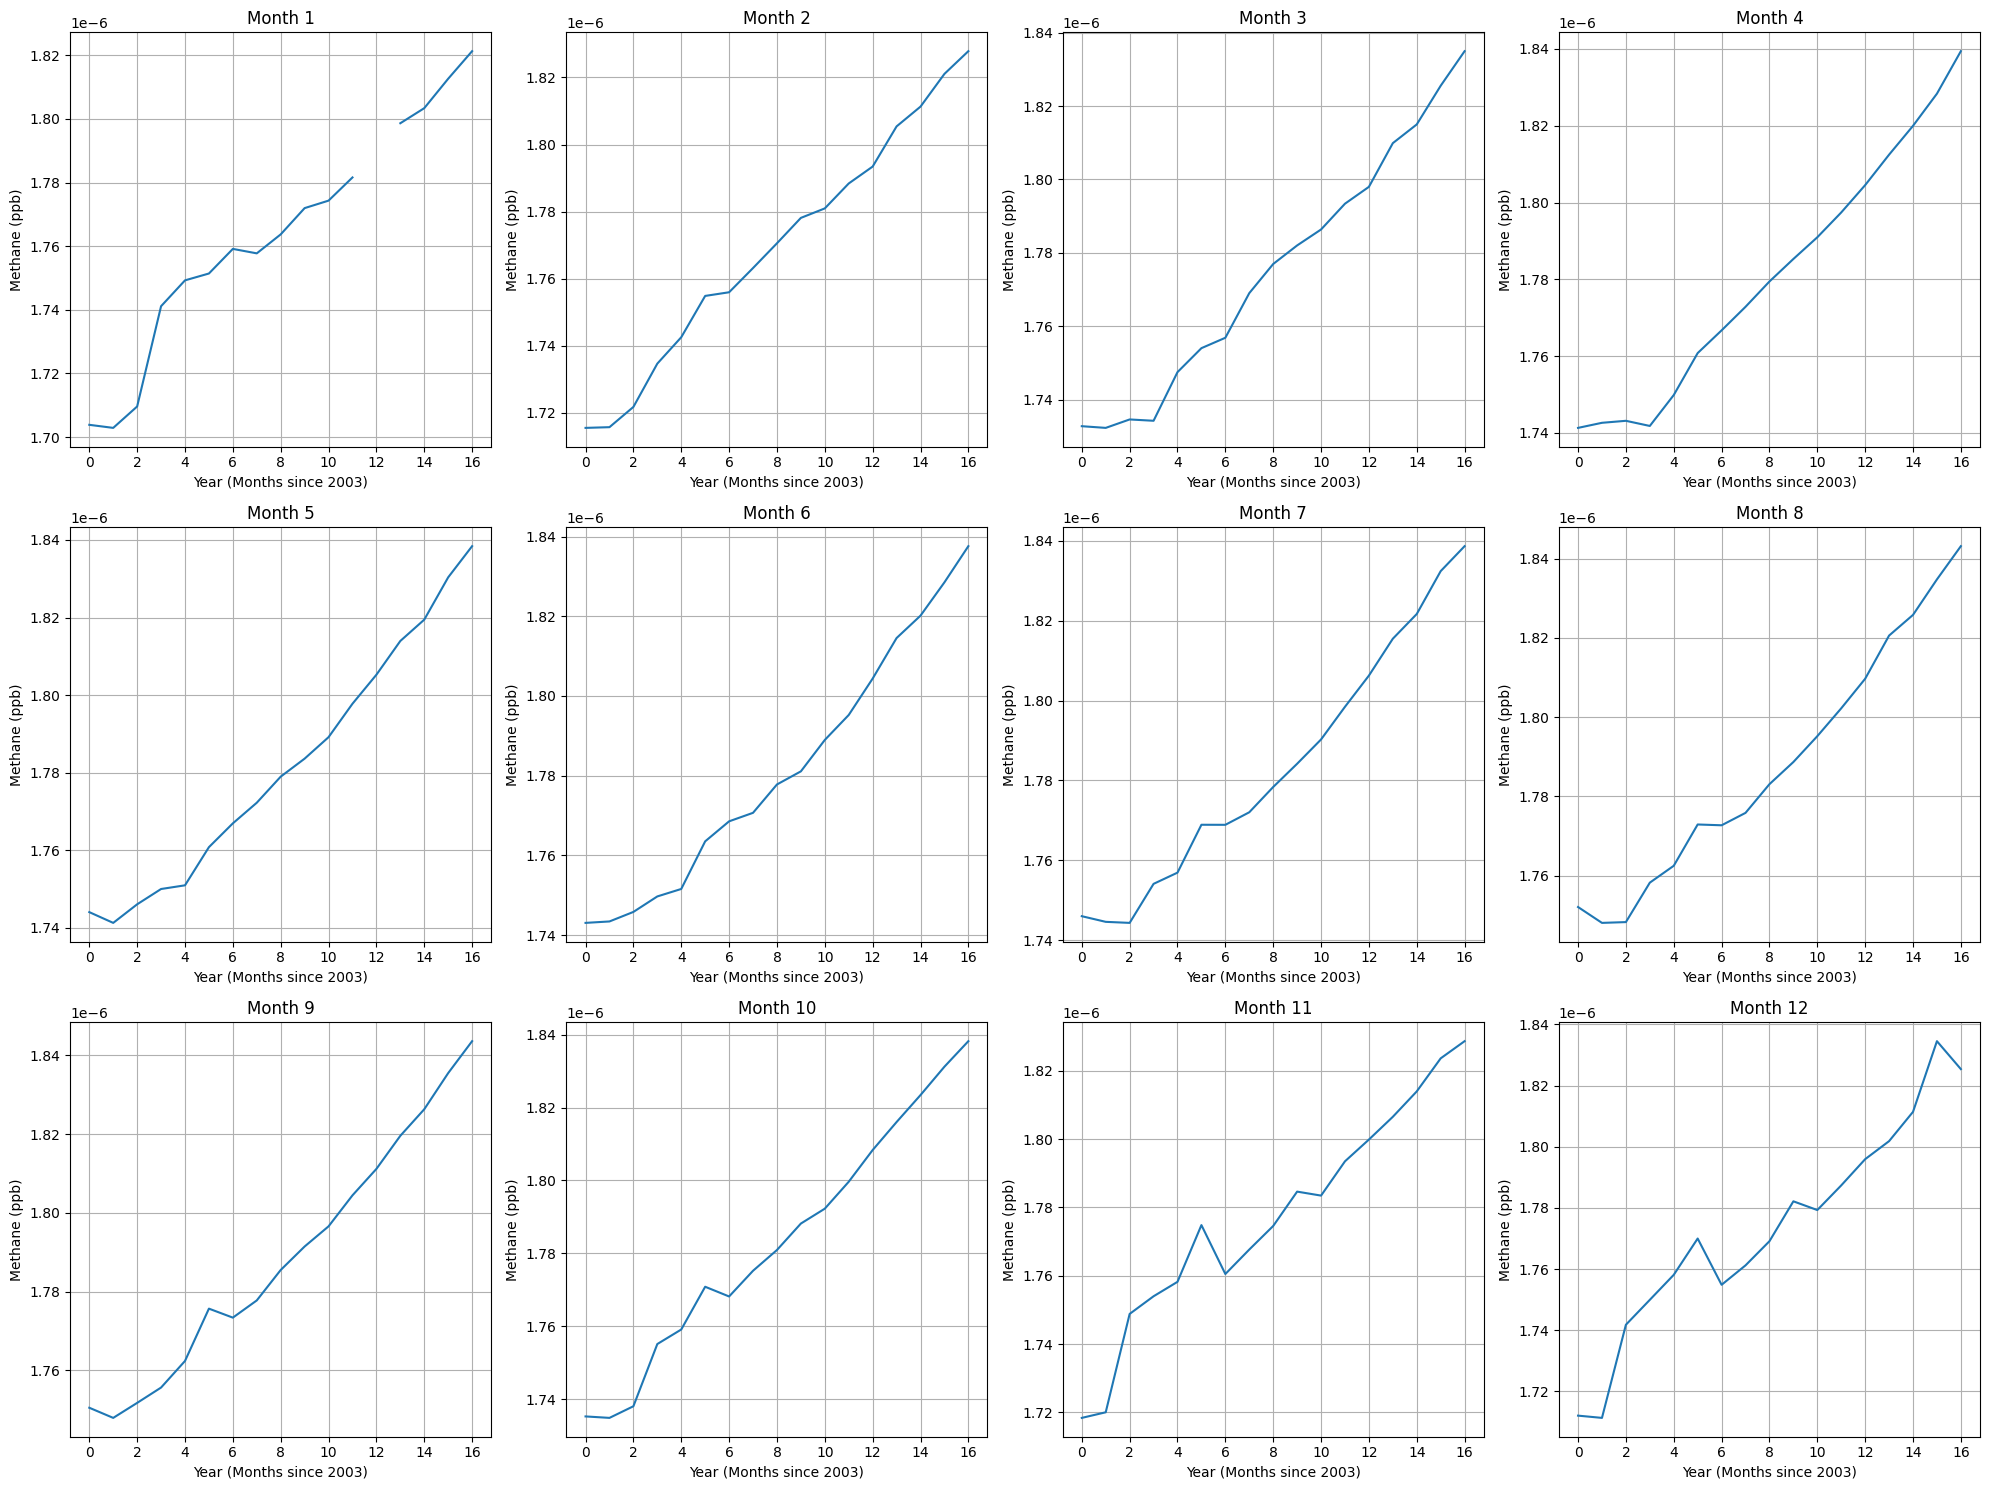

In [ ]:
#1.1
# NOTE: 这里期望看到 全球范围内甲烷分布情况，期望 ax.pcolormesh()
xch4 = data.variables['xch4'][:]  # 甲烷数据  
time = data.variables['time'][:]  # 时间数据  

# 获取月份的数量  
months_count = int(len(time) / 12)  # 计算总的月份数  

# 创建一个数组来存储每个月的甲烷水平  
monthly_values = np.zeros((months_count, 12))  

# 计算每个月的甲烷水平  
for i in range(months_count):  
    for month in range(12):  # 12个月  
        monthly_values[i, month] = xch4[i * 12 + month].mean()  # 取每个月的值  

# 绘制12幅子图  
fig, axs = plt.subplots(3, 4, figsize=(20, 15))  
for month in range(12):  
    ax = axs[month // 4, month % 4]  # 计算子图的位置  
    ax.plot(range(months_count), monthly_values[:, month], label=f'Month {month + 1}')  
    ax.set_title(f'Month {month + 1}')  
    ax.set_xlabel('Year (Months since 2003)')  
    ax.set_ylabel('Methane (ppb)')  
    ax.grid()  

plt.tight_layout()  
plt.show()  


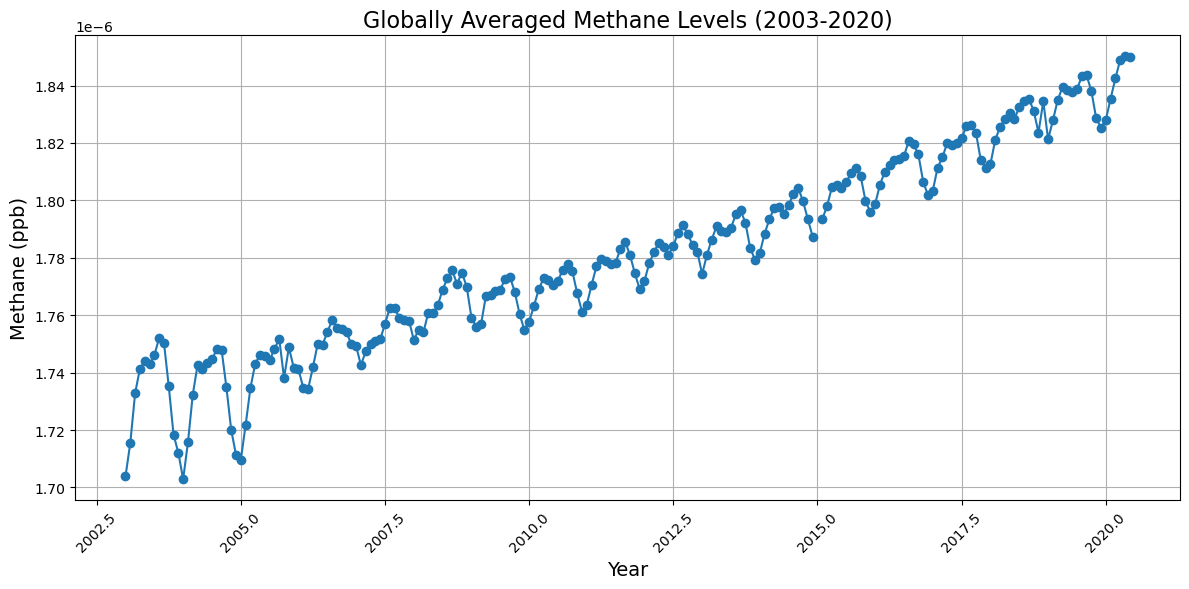

In [9]:
xch4 = data.variables['xch4'][:]  # 甲烷数据  
time = data.variables['time'][:]  # 时间数据  

n_time, n_lat, n_lon = xch4.shape  # 获取时间、纬度和经度的形状  

# 计算全球平均甲烷浓度  
global_mean_ch4 = np.mean(xch4, axis=(1, 2))  # 沿着纬度和经度的平均  

# 创建时间序列  
time_years = np.arange(2003, 2003 + n_time / 12, 1/12)  # 生成时间序列，确保长度匹配  

# 绘图  
plt.figure(figsize=(12, 6))  
plt.plot(time_years[:len(global_mean_ch4)], global_mean_ch4, marker='o')  # 确保长度匹配  
plt.title('Globally Averaged Methane Levels (2003-2020)', fontsize=16)  
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Methane (ppb)', fontsize=14)  
plt.xticks(rotation=45)  
plt.grid()  
plt.tight_layout()  
plt.show()

甲烷的浓度随着时间的增加而增加，且在一定的范围内上下波动。

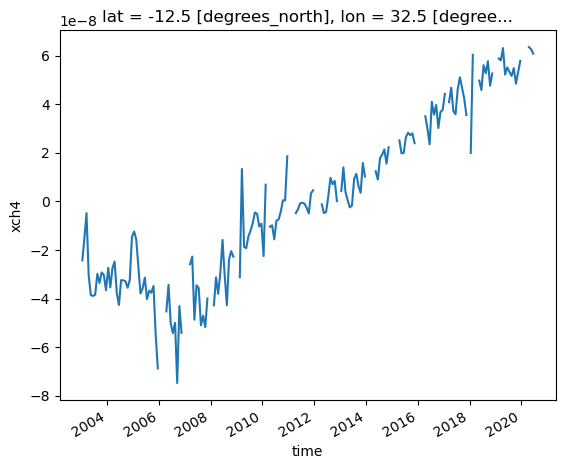

In [ ]:
#Remove the seasonal cycle
# plot a timeseries of the anomalies at the point 

# Group data by month
group_data = data.xch4.groupby('time.month')

# Apply mean to grouped data, and then compute the anomaly 
xch4_anom = group_data - group_data.mean(dim='time')


# Plot anomalies
sst_anom.sel(lon=30, lat=-15, 
             method='nearest').plot() # BUG: sst_anom NOT DEFINED, BUG: lon=30, lat=-15 WRONG


In [ ]:
有些数据缺失。

In [6]:
#2

sst_data = xr.open_dataset(q2_path, engine="netcdf4")
sst_data

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [7]:
sst_nino34 = sst_data.sel(lat=slice(-5, 5), lon=slice(190, 240))
sst_nino34

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 26, time: 684)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

Text(0.5, 1.0, 'SST anomaly over the Niño 3.4 region')

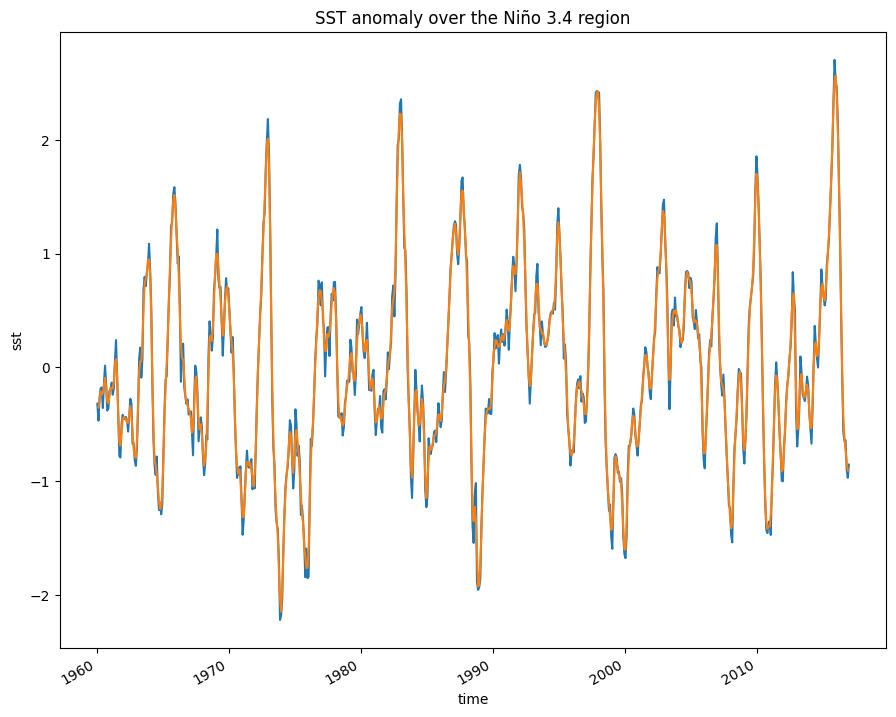

In [10]:
gb = sst_nino34.sst.groupby('time.month')
sst_nino34_anom = gb - gb.mean(dim='time')
index_nino34 = sst_nino34_anom.mean(dim=['lat', 'lon'])

index_nino34_rolling_mean = index_nino34.rolling(time=3, center=True).mean()

index_nino34.plot(size=8)
index_nino34_rolling_mean.plot()
plt.legend(['anomaly', '5-month running mean anomaly']) # NOTE: WHY 5 MONTH?
plt.title('SST anomaly over the Niño 3.4 region')

In [10]:
std_dev = sst_nino34.sst.std()
std_dev

normalized_index_nino34_rolling_mean = index_nino34_rolling_mean / std_dev

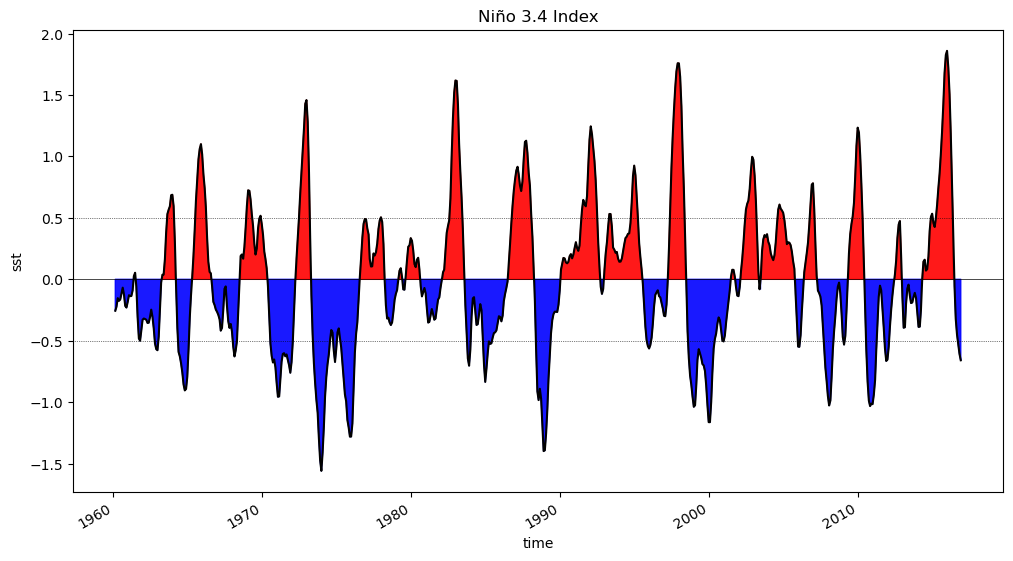

In [11]:
fig = plt.figure(figsize=(12, 6))

plt.fill_between(normalized_index_nino34_rolling_mean.time.data,
                 normalized_index_nino34_rolling_mean.where(normalized_index_nino34_rolling_mean >= 0).data,
    0,
    color='red',
    alpha=0.9,)
plt.fill_between(
    normalized_index_nino34_rolling_mean.time.data,
    normalized_index_nino34_rolling_mean.where(normalized_index_nino34_rolling_mean <= 0 ).data,
    0,
    color='blue',
    alpha=0.9,)

normalized_index_nino34_rolling_mean.plot(color='black')
plt.axhline(0, color='black', lw=0.5)
plt.axhline(0.5, color='black', linewidth=0.5, linestyle='dotted')
plt.axhline(-0.5, color='black', linewidth=0.5, linestyle='dotted')
plt.title('Niño 3.4 Index');

In [ ]:
第二题参考了（https://foundations.projectpythia.org/core/xarray/enso-xarray.html）该网站的方法。
在计算时，经度范围从 170°W 到 120°W 被写成 190°E 到 240°E 是为了方便处理经度范围并避免混淆。

In [ ]:
#3
# NOTE: MISSING  MERRA2_100.tavg1_2d_slv_Nx.19800101.nc4
data = xr.open_dataset(r"D:\ESE2024\ESE2024\MERRA2_100.tavg1_2d_slv_Nx.19800101.nc4", engine="netcdf4")
data

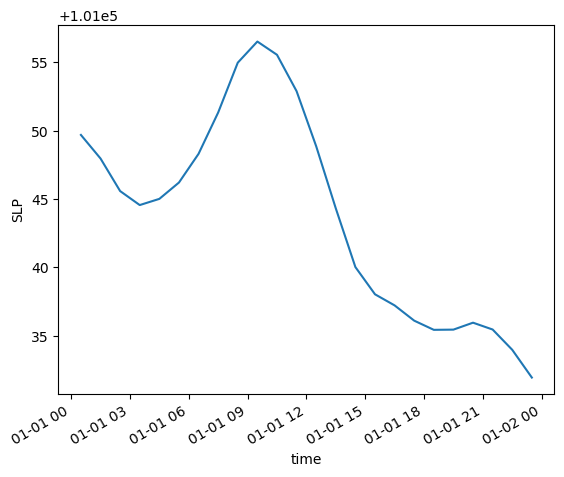

In [51]:
#3.1
# 3. Plot a time series of global monthly mean SST from 1900-01 to 2020-12.
data.SLP.mean(dim=('lon', 'lat')).sel(
    time=slice("1980-01-01T00:30:00.000000000", "1980-01-01T23:30:00.000000000")
).plot()

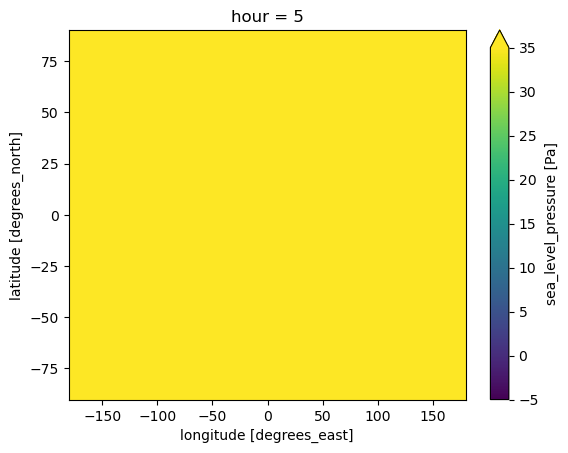

In [67]:
#3.2
SLP_clim = data.SLP.groupby('time.hour').mean()

SLP_clim[5,:,:].plot(vmin=-5, vmax=35)


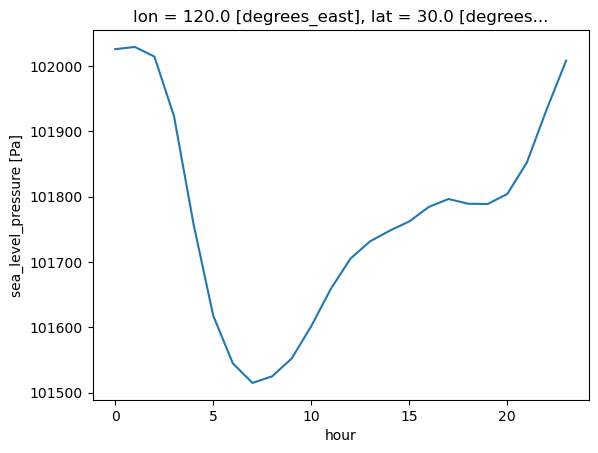

In [69]:
SLP_clim.sel(lon=120, lat=30, method='nearest').plot()

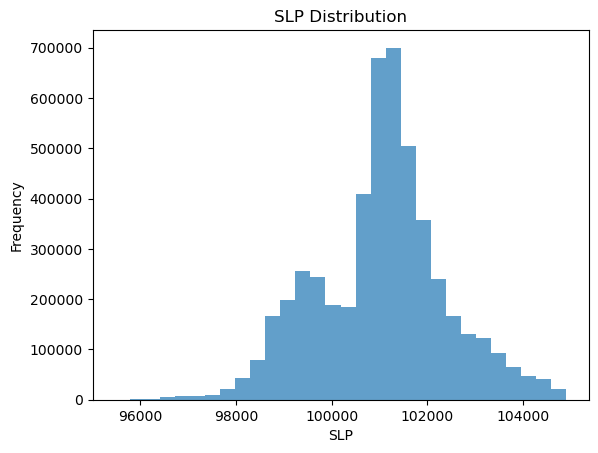

In [56]:
plt.hist(data['SLP'].values.flatten(), bins=30, alpha=0.7)  
plt.title('SLP Distribution')  
plt.xlabel('SLP')  
plt.ylabel('Frequency')  
plt.show()  

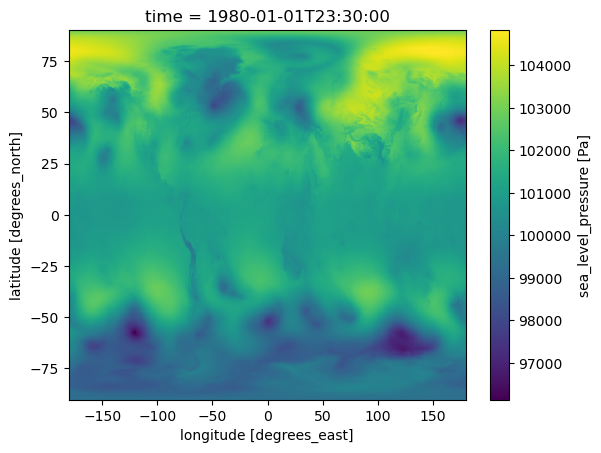

In [63]:
data.SLP[-1].plot()

在GES DISC上的数据的temporal resolution最长以月计（也可能是我没找到。
画图参考了Lab08。